<a href="https://colab.research.google.com/github/hustler0109/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/Brain_tumour_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras import models

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import random

In [ ]:
from PIL import Image

In [ ]:
from PIL import ImageEnhance

In [ ]:
import pandas as pd

In [ ]:
from keras.preprocessing.image import load_img

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
from tensorflow.keras.layers import Input

In [ ]:
from tensorflow.keras.layers import Flatten

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.optimizers import Adamax

In [ ]:
from tensorflow.keras.metrics import Recall

In [ ]:
from tensorflow.keras.metrics import Precision

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from tensorflow.keras.applications import VGG19

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.utils import shuffle

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import classification_report

Training & testing

In [ ]:
import os
from sklearn.utils import shuffle # Import the shuffle function
import pandas as pd

In [ ]:
training_dr = '/content/drive/MyDrive/ColabNotebooks/training'
testing_dr = '/content/drive/My Drive/ColabNotebooks/testing'

In [ ]:
training_paths = []
training_labels =[]

In [ ]:
for label in os.listdir(training_dr):
    for image in os.listdir(os.path.join(training_dr, label)):
        training_paths.append(os.path.join(training_dr, label, image))
        training_labels.append(label)
        training_paths, training_labels = shuffle(training_paths, training_labels)

In [ ]:
testing_paths=[]
testing_labels=[]
for label in os.listdir(testing_dr):
    for image in os.listdir(os.path.join(testing_dr, label)):
        testing_paths.append(os.path.join(testing_dr, label, image))
        testing_labels.append(label)
        testing_paths, testing_labels = shuffle(testing_paths, testing_labels)

In [ ]:
train_df = pd.DataFrame({'ClassPath' : training_paths, 'Class' : training_labels})
test_df = pd.DataFrame({'ClassPath' : testing_paths, 'Class' : testing_labels})

In [ ]:
valid_df, ts_df = train_test_split(test_df, train_size=0.5,random_state=20,stratify=test_df['Class'])

Data Visualization

In [ ]:
  import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import random

In [ ]:
from PIL import Image

In [ ]:
import os

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
random_indices = random.sample(range(len(training_paths)),10)

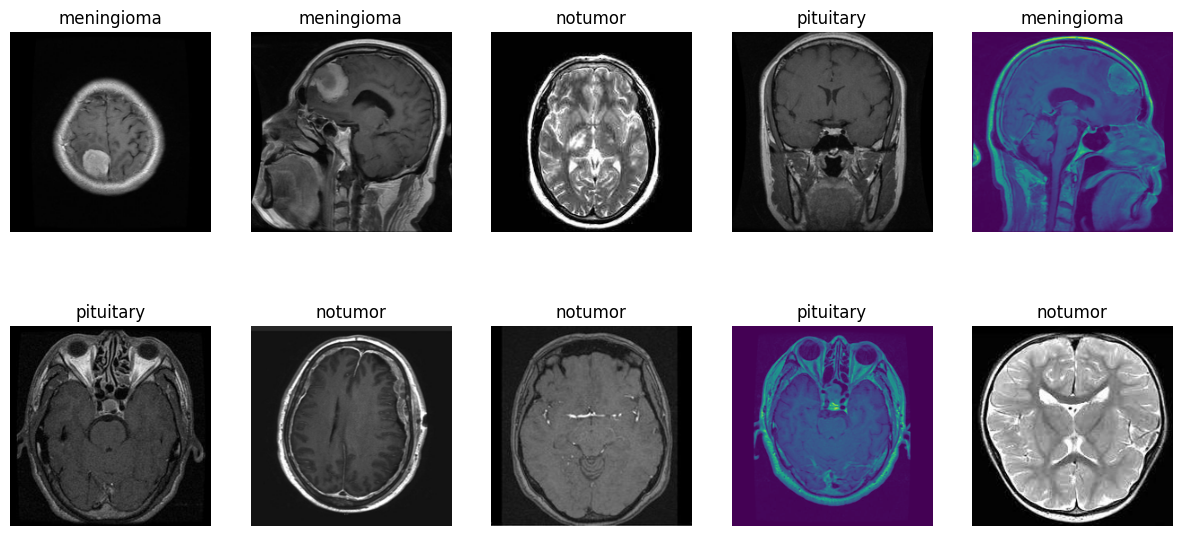

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))
axes = axes.ravel()
for i, index in enumerate(random_indices):
    img = Image.open(training_paths[index])
    img = img.resize((224, 224))
    axes[i].imshow(img)
    axes[i].set_title(training_labels[index])
    axes[i].axis('off')

In [ ]:
batch_size = 32
img_size = (299,299)
_gen = ImageDataGenerator(rescale = 1./255 , brightness_range = (0.8,1.2))
ts_gen = ImageDataGenerator(rescale = 1./255)
# Use flow_from_dataframe instead of flowfrom_dataframe
tr_gen = _gen.flow_from_dataframe(train_df,x_col='ClassPath',y_col='Class',target_size=img_size,class_mode='categorical',batch_size=batch_size,shuffle=True)
valid_gen = _gen.flow_from_dataframe(valid_df,x_col='ClassPath',y_col='Class',target_size=img_size,class_mode='categorical',batch_size=batch_size,shuffle=False)
ts_gen = ts_gen.flow_from_dataframe(ts_df,x_col='ClassPath',y_col='Class',target_size=img_size,class_mode='categorical',batch_size=batch_size,shuffle=False)

Found 5819 validated image filenames belonging to 4 classes.
Found 665 validated image filenames belonging to 4 classes.
Found 666 validated image filenames belonging to 4 classes.


Model Architecture

In [ ]:
img_shape = (299,299,3)
base_model = tf.keras.applications.Xception(include_top=False,weights='imagenet',input_shape=img_shape, pooling = 'max')

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Final Model

In [ ]:
model = Sequential([
                    base_model,
                    Flatten(),
                    Dropout(rate = 0.3),
                    Dense(128, activation = 'relu'),
                    Dropout(rate = 0.25),
                    Dense(4, activation = 'softmax'),
                    ])

Model Compilation

In [ ]:
model.compile(Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy',Recall(),Precision()])

Model Training

In [ ]:
history = model.fit(tr_gen,epochs=10,validation_data=valid_gen,shuffle = False)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 10451s 57s/step - accuracy: 0.7175 - loss: 0.8575 - precision: 0.8059 - recall: 0.5941 - val_accuracy: 0.7955 - val_loss: 0.5049 - val_precision: 0.8037 - val_recall: 0.7940
Epoch 2/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 10441s 57s/step - accuracy: 0.9762 - loss: 0.0779 - precision: 0.9775 - recall: 0.9737 - val_accuracy: 0.9383 - val_loss: 0.1491 - val_precision: 0.9438 - val_recall: 0.9338
Epoch 3/10
149/182 ━━━━━━━━━━━━━━━━━━━━ 30:32 56s/step - accuracy: 0.9907 - loss: 0.0349 - precision: 0.9913 - recall: 0.9892

In [ ]:
history = model.fit(
    tr_gen,
    epochs=10,  # Or your total number of epochs
    validation_data=valid_gen,
    shuffle=False,
    initial_epoch=3  # Add this!
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 4/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 11183s 61s/step - accuracy: 0.7866 - loss: 0.6477 - precision_4: 0.8342 - recall_4: 0.6904 - val_accuracy: 0.8767 - val_loss: 0.3300 - val_precision_4: 0.8828 - val_recall_4: 0.8722
Epoch 5/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 10982s 60s/step - accuracy: 0.9773 - loss: 0.0669 - precision_4: 0.9793 - recall_4: 0.9764 - val_accuracy: 0.9805 - val_loss: 0.0556 - val_precision_4: 0.9804 - val_recall_4: 0.9774
Epoch 6/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 10999s 60s/step - accuracy: 0.9943 - loss: 0.0220 - precision_4: 0.9943 - recall_4: 0.9942 - val_accuracy: 0.9744 - val_loss: 0.0760 - val_precision_4: 0.9759 - val_recall_4: 0.9744
Epoch 7/10
 77/182 ━━━━━━━━━━━━━━━━━━━━ 1:43:21 59s/step - accuracy: 0.9984 - loss: 0.0064 - precision_4: 0.9985 - recall_4: 0.9984

In [ ]:
history = model.fit(
    tr_gen,
    epochs=10,  # Or your total number of epochs
    validation_data=valid_gen,
    shuffle=False,
    initial_epoch=7  # Add this!
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 8/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 10331s 57s/step - accuracy: 0.7429 - loss: 0.7234 - precision: 0.8311 - recall: 0.6524 - val_accuracy: 0.9098 - val_loss: 0.2118 - val_precision: 0.9125 - val_recall: 0.9098
Epoch 9/10
106/182 ━━━━━━━━━━━━━━━━━━━━ 1:08:39 54s/step - accuracy: 0.9858 - loss: 0.0481 - precision: 0.9864 - recall: 0.9839